Lets have fun with building Decision Trees:

You are building the decision tree classifier with the Scikit learn.

Downlaod the data of Pima Indian diabetes from Kaggle.

Feature Selection - you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

Split the data and then build decision tree.

Use visualisation to showcase the pictorial representation.

Find the Entropy, Information gain and Gini Index to support why you choose the specific root node.

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn import tree

In [4]:
# Step 2: Load the dataset
# Download 'diabetes.csv' from Kaggle and place it in your working directory
data = pd.read_csv('diabetes.csv')

# Display first few rows
print("Dataset Preview:\n", data.head())


Dataset Preview:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# Step 3: Feature Selection
# Independent Variables (Features)
X = data.drop('Outcome', axis=1)

# Dependent Variable (Target)
y = data['Outcome']

In [6]:
# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Step 5: Build the Decision Tree model
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

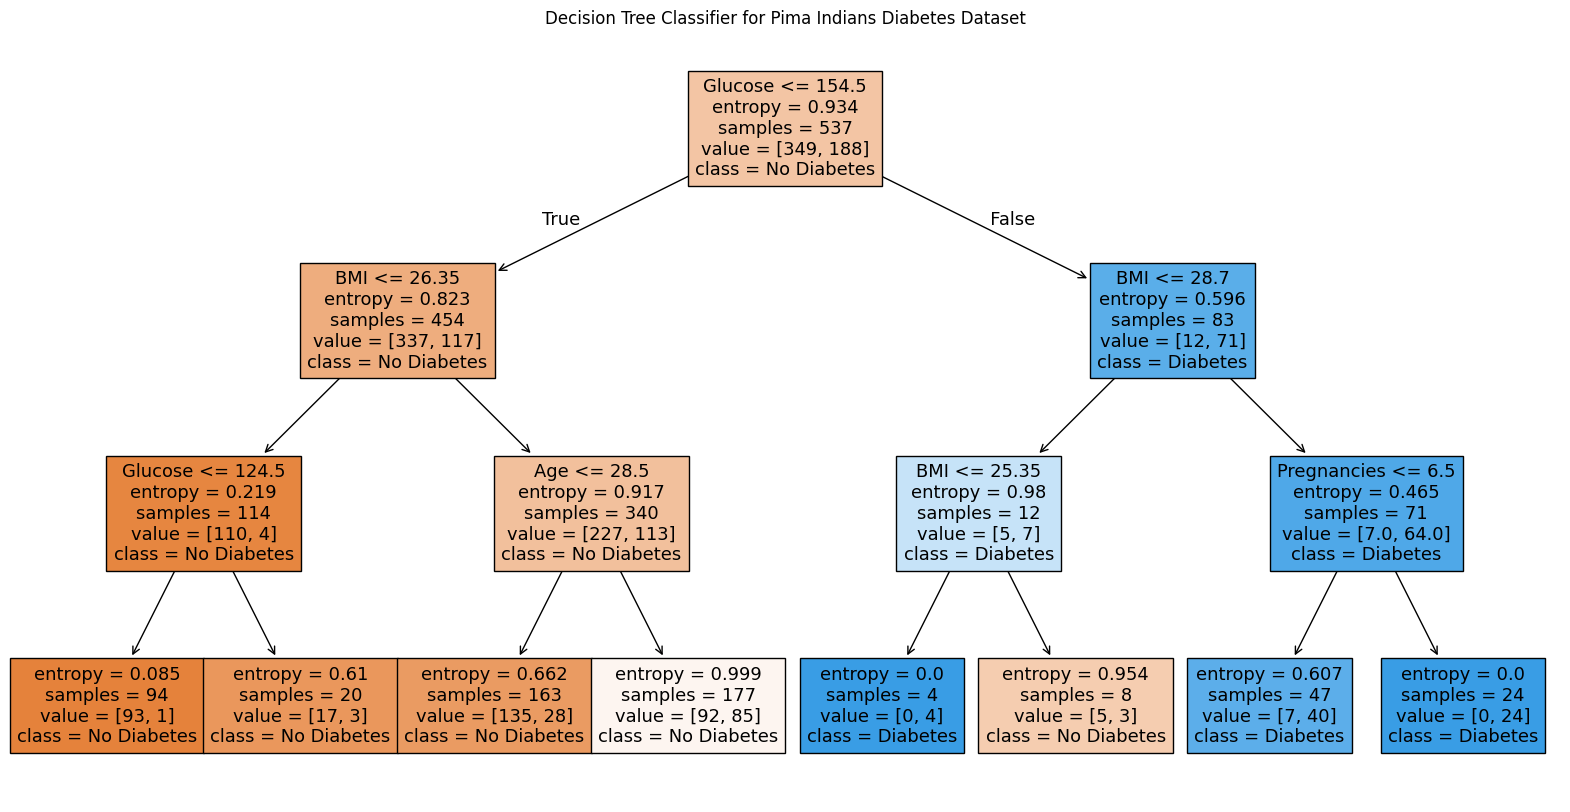

In [8]:
# Step 6: Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Classifier for Pima Indians Diabetes Dataset")
plt.show()


In [9]:
# Step 7: Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

Model Accuracy: 71.86 %


In [10]:
# Helper functions to compute entropy and information gain
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

In [11]:
# Step 9: Calculate total entropy
p1 = y.mean()  # proportion of diabetes (Outcome = 1)
total_entropy = entropy(p1)
print("Total Entropy of Dataset:", round(total_entropy, 4))


Total Entropy of Dataset: 0.9331


In [12]:
# Step 10: Example calculation for Information Gain for 'Glucose'
threshold = data['Glucose'].median()
left = data[data['Glucose'] <= threshold]
right = data[data['Glucose'] > threshold]

# Entropy for left and right splits
p_left = left['Outcome'].mean()
p_right = right['Outcome'].mean()

entropy_left = entropy(p_left)
entropy_right = entropy(p_right)

# Weighted Average Entropy after split
weighted_entropy = (len(left)/len(data))*entropy_left + (len(right)/len(data))*entropy_right

# Information Gain
info_gain = total_entropy - weighted_entropy

print(f"Information Gain for 'Glucose' split at {threshold}: {round(info_gain, 4)}")


Information Gain for 'Glucose' split at 117.0: 0.1173


In [13]:
# Step 11: Gini Index calculation
def gini(p):
    return 1 - p**2 - (1-p)**2

gini_total = gini(p1)
gini_left = gini(p_left)
gini_right = gini(p_right)
weighted_gini = (len(left)/len(data))*gini_left + (len(right)/len(data))*gini_right
gini_gain = gini_total - weighted_gini

print(f"Gini Gain for 'Glucose' split at {threshold}: {round(gini_gain, 4)}")

Gini Gain for 'Glucose' split at 117.0: 0.0712
